# Graph Results of stats using duckdb

In [11]:
import duckdb
import pandas

con = duckdb.connect(database='../../data/foot-data-Transfermarkt.duckdb', read_only=True)

df_season_overview = con.execute("SELECT season, home, \
            SUM(yellow_cards) as yc, SUM(red_cards) as rc, \
            SUM(goals) as goals, SUM(assists) as assists \
            FROM  player_actions_cards\
            GROUP BY season, home \
            ORDER BY season ASC, home ASC").fetchdf()

print(df_season_overview)

    season   home     yc    rc  goals  assists
0     2013  False   17.0   0.0    4.0      4.0
1     2013   True    8.0   0.0   14.0     13.0
2     2014  False  586.0  24.0  291.0    216.0
3     2014   True  421.0  11.0  369.0    306.0
4     2015  False  567.0  24.0  281.0    199.0
5     2015   True  413.0  13.0  384.0    276.0
6     2016  False  509.0  19.0  273.0    201.0
7     2016   True  395.0  13.0  370.0    267.0
8     2017  False  610.0  15.0  301.0    222.0
9     2017   True  508.0  16.0  363.0    260.0
10    2018  False  601.0  13.0  311.0    259.0
11    2018   True  468.0   6.0  358.0    272.0
12    2019  False  467.0  13.0  254.0    199.0
13    2019   True  355.0   3.0  357.0    275.0
14    2020  False  608.0  16.0  446.0    329.0
15    2020   True  570.0  23.0  467.0    340.0
16    2021  False  723.0  29.0  398.0    313.0
17    2021   True  536.0  24.0  451.0    351.0
18    2022  False  568.0  25.0  357.0    281.0
19    2022   True  500.0  23.0  418.0    326.0


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
years = pandas.unique(df_season_overview['season'])
df_season_overview.loc[df_season_overview['home'] == True]
df_season_overview.loc[df_season_overview['home'] == True, 'yc']

1       8.0
3     421.0
5     413.0
7     395.0
9     508.0
11    468.0
13    355.0
15    570.0
17    536.0
19    500.0
Name: yc, dtype: float64

Text(0, 0.5, 'Yellow cards')

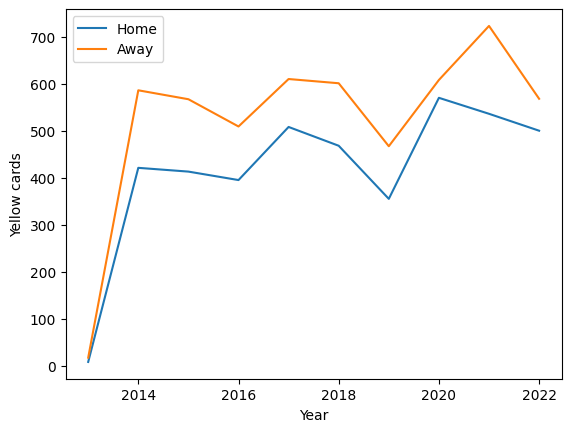

In [15]:
plt.plot(years, df_season_overview.loc[df_season_overview['home'] == True, 'yc'], label='Home')
plt.plot(years, df_season_overview.loc[df_season_overview['home'] == False, 'yc'], label='Away')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Yellow cards')

Text(0, 0.5, 'Red cards')

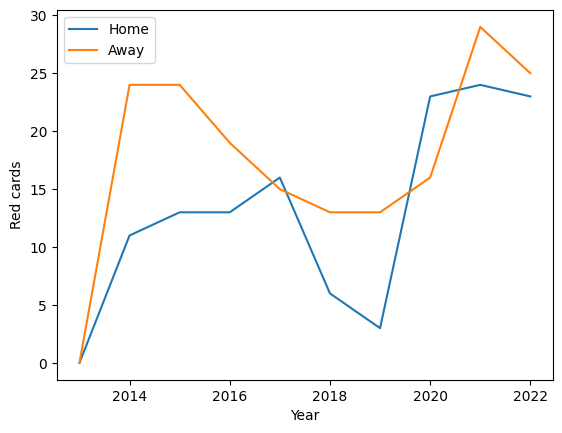

In [16]:
plt.plot(years, df_season_overview.loc[df_season_overview['home'] == True, 'rc'], label='Home')
plt.plot(years, df_season_overview.loc[df_season_overview['home'] == False, 'rc'], label='Away')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Red cards')

Text(0, 0.5, 'Goals')

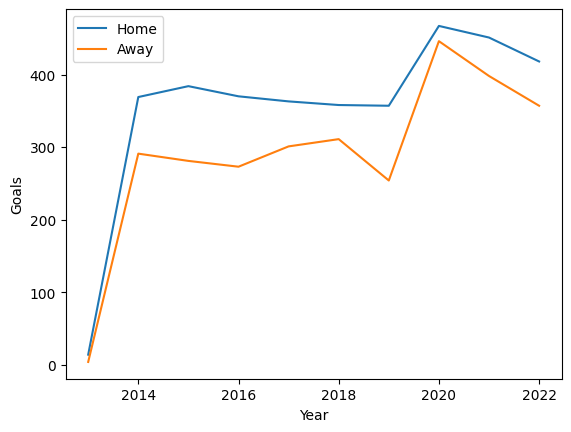

In [17]:
plt.plot(years, df_season_overview.loc[df_season_overview['home'] == True, 'goals'], label='Home')
plt.plot(years, df_season_overview.loc[df_season_overview['home'] == False, 'goals'], label='Away')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Goals')

Text(0, 0.5, 'Assists')

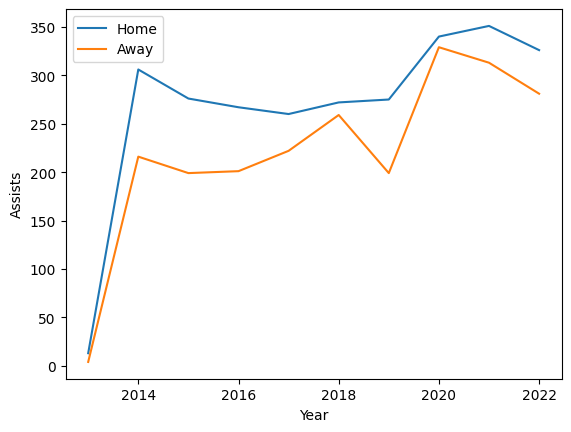

In [18]:
plt.plot(years, df_season_overview.loc[df_season_overview['home'] == True, 'assists'], label='Home')
plt.plot(years, df_season_overview.loc[df_season_overview['home'] == False, 'assists'], label='Away')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Assists')

In [19]:
df_season_overview['yc'].corr(df_season_overview['goals'])

0.7762810385416882

<Axes: title={'center': 'Correlation while At home'}>

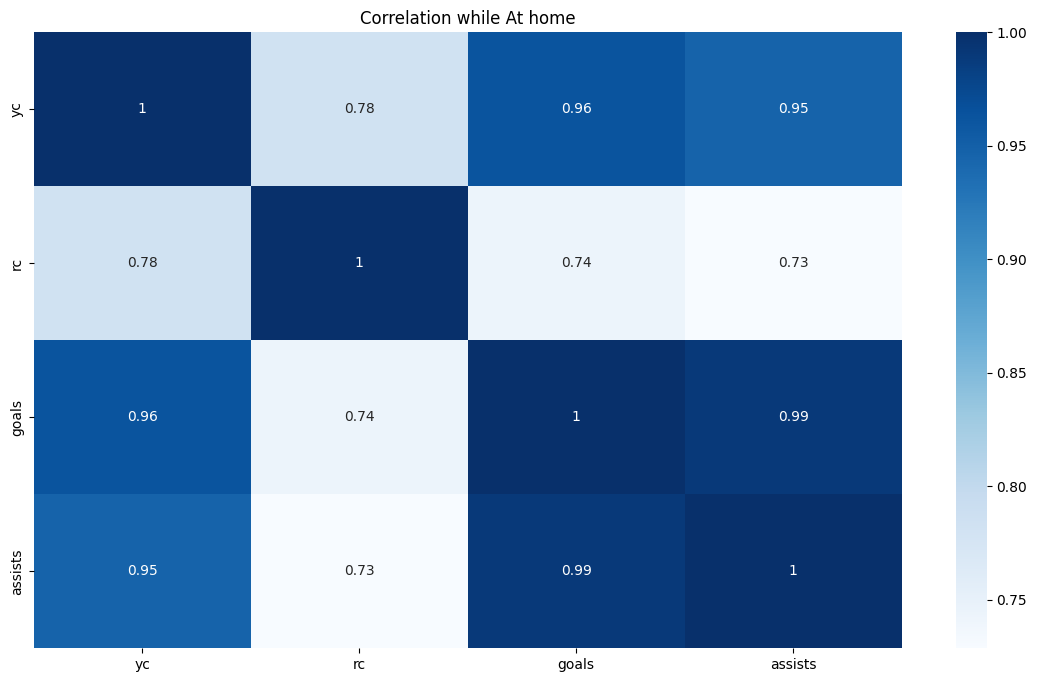

In [26]:
import seaborn as sns
plt.figure(figsize=(14,8))
plt.title('Correlation while At home')
df_season_at_home_overview = df_season_overview.loc[df_season_overview['home'] == True]
df_season_at_home_overview = df_season_at_home_overview.drop(columns=['season','home'])
sns.heatmap(df_season_at_home_overview.corr(numeric_only=True), annot=True, cmap='Blues')

<Axes: title={'center': 'Correlation while Away'}>

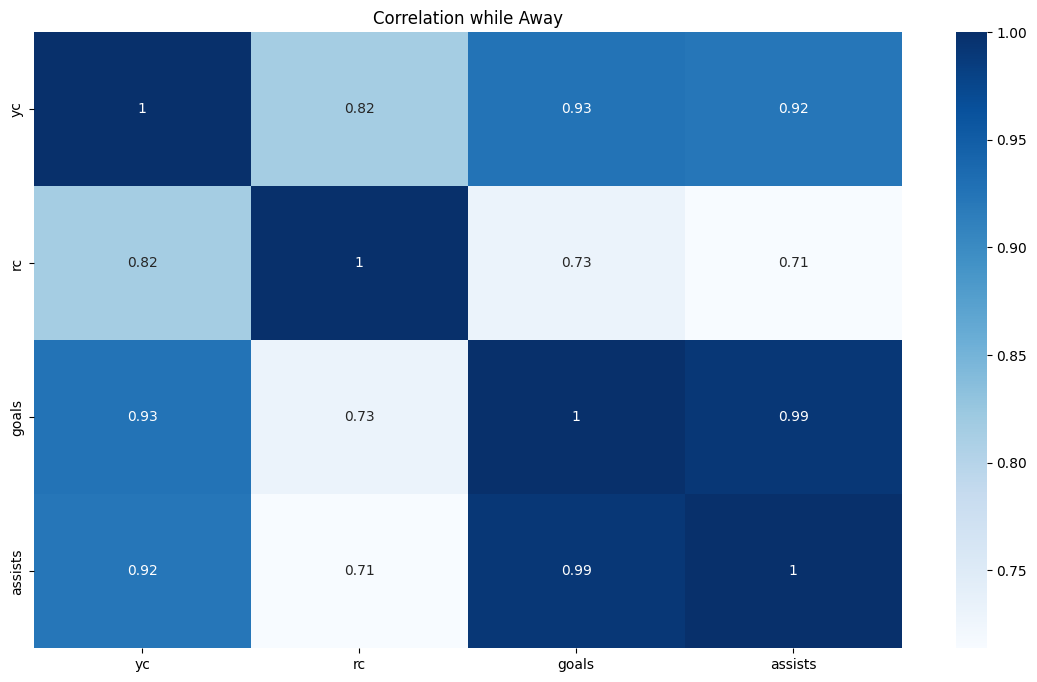

In [27]:
df_season_away_overview = df_season_overview.loc[df_season_overview['home'] == False]
df_season_away_overview = df_season_away_overview.drop(columns=['season','home'])
plt.figure(figsize=(14,8))
plt.title('Correlation while Away')
sns.heatmap(df_season_away_overview.corr(numeric_only=True), annot=True, cmap='Blues')

In [34]:
from scipy.stats import pearsonr
print("At Home pearsonr correlation + p value")
print(pearsonr(df_season_at_home_overview['yc'],df_season_at_home_overview['goals']))
print("Away pearsonr correlation + p value")
print(pearsonr(df_season_away_overview['yc'],df_season_away_overview['goals']))
print("correlation between while at home and while away Yellow Cards")
print(pearsonr(df_season_at_home_overview['yc'],df_season_away_overview['yc']))

At Home pearsonr correlation + p value
PearsonRResult(statistic=0.9625424622198403, pvalue=8.231494527684705e-06)
Away pearsonr correlation + p value
PearsonRResult(statistic=0.9255936144962864, pvalue=0.0001224909992278358)
correlation between while at home and while away Yellow Cards
PearsonRResult(statistic=0.9645841471795058, pvalue=6.594638917988774e-06)
